# PASO 3: IMPLEMENTACIÓN ALGORITMO REG. LINEAL



In [15]:
import numpy  as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

%matplotlib inline

# Quitar cuando se trabaje en un proyecto real
import warnings
warnings.filterwarnings('ignore')

In [16]:
preprocess_train = pd.read_csv('./prepoces_day_train.csv', sep=';', decimal='.')
preprocess_test = pd.read_csv('./preproces_day_test.csv', sep=';', decimal='.')

In [17]:
# Train
data_train = preprocess_train.values
y_test = data_train[:, 0:1].ravel()  # nos quedamos con la 1ª columna, price
X_train = data_train[:, 1:]  # nos quedamos con el resto

# Test
data_test = preprocess_test.values
y_test = data_test[:,0:1].ravel()      # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

In [18]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)

In [19]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (11085, 21)
Datos test:  (3695, 21)


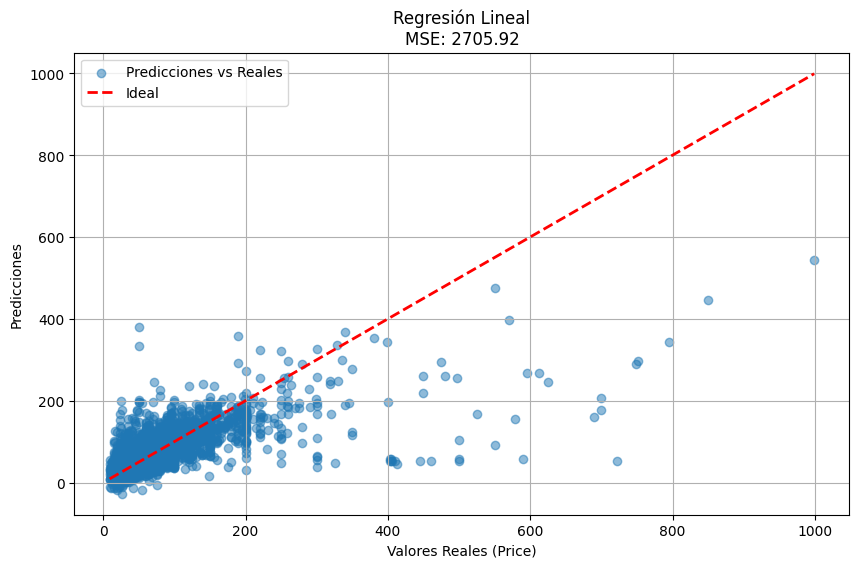

Intercepto: 94.2332261007964
Coeficientes:
w1: 0.02516278979699094
w2: -0.8259368523922412
w3: -0.14791005601886442
w4: 3.383847511778991
w5: 23.010027646478417
w6: 14.78334601994425
w7: -0.005096366719338422
w8: 0.6393838528814744
w9: 1.1870867111636867
w10: -0.08344257190910383
w11: -0.5868911050718317
w12: 1.0717110548587502e-05
w13: 0.03727145792195895
w14: -0.18336781392293908
w15: -0.11414629999437904
w16: -2.0121587861423724
w17: -0.010434857814041661
w18: -0.002584199784921082
w19: 0.000582220647047986
w20: -30.606087119817875
w21: -1.9327604697214418

||w||_2^2 = 1.7e+03
MSE Modelo Lasso (test): 2.71e+03
RMSE Modelo Lasso (test): 52


In [23]:
# Instanciar el modelo de regresión lineal
lr2 = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
lr2.fit(X_test, y_test)

# Predicciones en el conjunto de entrenamiento
y_pred_test = lr2.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse_test = mean_squared_error(y_test, y_pred_test)

# Visualización de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, label="Predicciones vs Reales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal")
plt.title(f"Regresión Lineal\nMSE: {mse_test:.2f}")
plt.xlabel("Valores Reales (Price)")
plt.ylabel("Predicciones")
plt.legend()
plt.grid()
plt.show()

# Mostrar coeficientes del modelo
print(f"Intercepto: {lr2.intercept_}")
print("Coeficientes:")
for i, coef in enumerate(lr2.coef_):
    print(f"w{i+1}: {coef}")

# Calcular la norma L2 de los coeficientes (excluyendo el intercepto)
norm_w2 = np.dot(lr2.coef_, lr2.coef_)
print(f"\n||w||_2^2 = {norm_w2:.2g}")

mseTrainModelLasso = mean_squared_error(y_test,y_pred_test)

print('MSE Modelo Lasso (test): %0.3g' % mse_test)
print('RMSE Modelo Lasso (test): %0.3g' % np.sqrt(mse_test))


In [ ]:
# Instanciar el modelo de regresión lineal
lr2 = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
lr2.fit(X_test, y_test)

# Predicciones en el conjunto de entrenamiento
y_pred_test = lr2.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse_test = mean_squared_error(y_test, y_pred_test)

# Visualización de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, label="Predicciones vs Reales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal")
plt.title(f"Regresión Lineal\nMSE: {mse_test:.2f}")
plt.xlabel("Valores Reales (Price)")
plt.ylabel("Predicciones")
plt.legend()
plt.grid()
plt.show()

# Mostrar coeficientes del modelo
print(f"Intercepto: {lr2.intercept_}")
print("Coeficientes:")
for i, coef in enumerate(lr2.coef_):
    print(f"w{i+1}: {coef}")

# Calcular la norma L2 de los coeficientes (excluyendo el intercepto)
norm_w2 = np.dot(lr2.coef_, lr2.coef_)
print(f"\n||w||_2^2 = {norm_w2:.2g}")

mseTrainModelLasso = mean_squared_error(y_test,y_pred_test)

print('MSE Modelo Lasso (train): %0.3g' % mse_test)
print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mse_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best mean cross-validation score: -3038.986
best parameters: {'alpha': 0.37926901907322497}


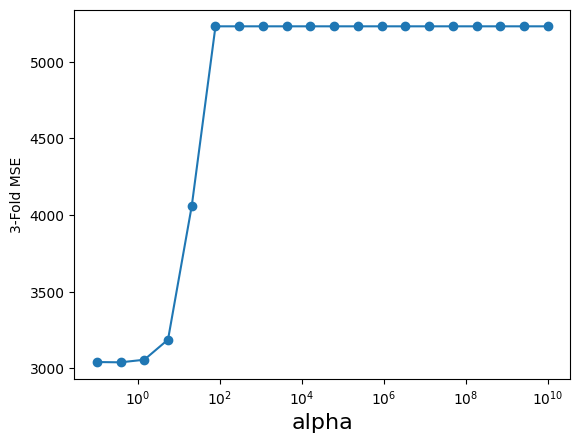

In [11]:
alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose=1)
grid.fit(XtrainScaled, y_test)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [12]:
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_test)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_test,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = preprocess_train.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 3e+03
MSE Modelo Lasso (test) : 3.38e+03
RMSE Modelo Lasso (train): 54.7
RMSE Modelo Lasso (test) : 58.1
Host Response Rate -0.0
Latitude -1.2161122805097793
Longitude -0.3773928788620584
Accommodates 16.23447268316683
Bathrooms 9.688935716308164
Bedrooms 9.187142301479563
Security Deposit -0.0
Cleaning Fee 15.90601292566059
Guests Included -0.0
Extra People -2.5699604883369016
Minimum Nights -0.05339318911627005
Maximum Nights -0.0
Availability 365 2.950182081304519
Review Scores Rating -6.095799249212674
Calculated host listings count -0.051894955515452625
Reviews per Month -3.351736042573387
Market codif -10.095704167769373
Property Type codif -1.2971286463402443
Bed Type codif 0.0
Room Type codif -11.062291663672362
Cancellation Policy codif -2.452730591811058
